In [17]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
from synutility.SynIO.data_type import load
from synutility.SynVis.graph_visualizer import GraphVisualizer

In [ ]:
data = load('data/ITS_graphs.pkl.gz')

In [46]:
its_graph = data[0]['ITS']
its_graph.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 32, 17, 18, 19, 20, 21, 22, 35))

In [49]:
def get_reaction_center(its_graph):

    def filter_rcs(G, u, v):
        return G.edges[u, v]['standard_order'] != 0
    
    reaction_center = nx.subgraph_view(its_graph, filter_edge=lambda u, v: filter_rcs(its_graph, u, v)).copy()
    reaction_center.remove_nodes_from(list(nx.isolates(reaction_center)))

    return reaction_center

In [50]:
reaction_center = get_reaction_center(its_graph)

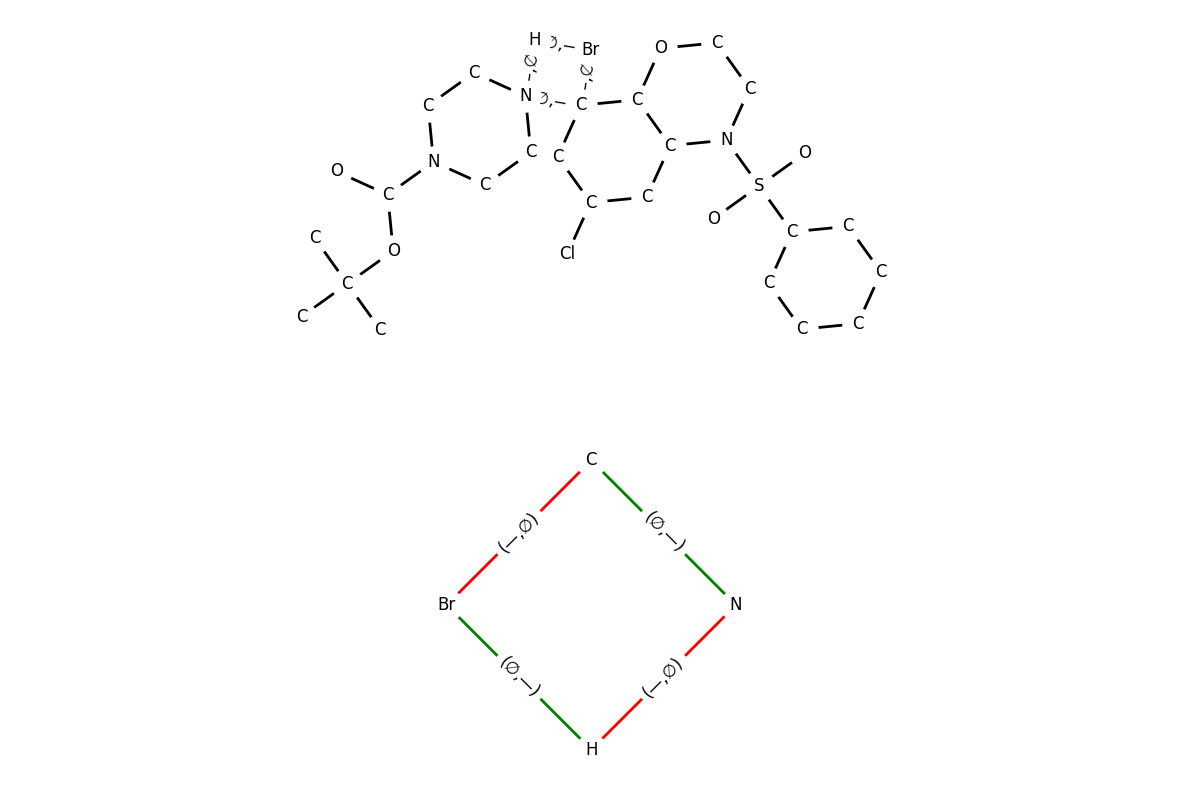

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
vis = GraphVisualizer()

# Plot ITS graph and its reaction center
vis.plot_its(its_graph, ax[0], use_edge_color=True)
vis.plot_its(reaction_center, ax[1], use_edge_color=True)

# Display the plots
plt.show()